<a href="https://colab.research.google.com/github/rsh456/R-AI/blob/main/S1/Sesion_1_R_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
install.packages("dplyr", dependencies = TRUE)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘profmem’, ‘plogr’, ‘bench’, ‘Lahman’, ‘lobstr’, ‘microbenchmark’, ‘nycflights13’, ‘RMySQL’, ‘RPostgreSQL’, ‘RSQLite’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




**Tarea 1: Exploración inicial del dataset**
* Cargar el dataset mtcars
* Mostrar las primeras 7 filas  del dataset. (usa help)
* Mostrar la estructura del dataset (str())




In [5]:
data(mtcars)
head(mtcars, n=7)
str(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360,245,3.21,3.570,15.84,0,0,3,4


'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


* Obtener un resumen estadístico de las variables numéricas.(utiliza la función skim del paquete skimr)


In [6]:
install.packages("skimr", dependencies = TRUE)
library(skimr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
skim_output <- skim(mtcars)

In [9]:
print(skim_output)

── Data Summary ────────────────────────
                           Values
Name                       mtcars
Number of rows             32    
Number of columns          11    
_______________________          
Column type frequency:           
  numeric                  11    
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate    mean      sd    p0    p25    p50
 1 mpg                   0             1  20.1     6.03  10.4   15.4   19.2 
 2 cyl                   0             1   6.19    1.79   4      4      6   
 3 disp                  0             1 231.    124.    71.1  121.   196.  
 4 hp                    0             1 147.     68.6   52     96.5  123   
 5 drat                  0             1   3.60    0.535  2.76   3.08   3.70
 6 wt                    0             1   3.22    0.978  1.51   2.58   3.32
 7 qsec                  0      

* Identificar cuántas filas y columnas tiene el dataset.

In [10]:
num_rows <- nrow(mtcars)
num_cols <- ncol(mtcars)
cat("Numero de columnas:",num_cols,"\nNumero de filas:", num_rows)

Numero de columnas: 11 
Numero de filas: 32


* Calcula la desviación estándar de al menos 3 variables (usa la función sd())

In [14]:
mpg_sd <- sd(mtcars$mpg)
hp_sd <- sd(mtcars$hp)
qsec_sd <- sd(mtcars$qsec)

cat(mpg_sd, hp_sd, qsec_sd)

6.026948 68.56287 1.786943

**Tarea 2: Filtrado y selección de datos**

* Filtrar los autos que tienen más de 10 millas por galón (mpg > 10).


In [17]:
autos_mpg_mayor_10 <- mtcars %>%
  filter(mpg>10) %>%
  select(mpg, cyl, hp, wt)

head(autos_mpg_mayor_10)

,mpg,cyl,hp,wt
,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,110,2.620
Mazda RX4 Wag,21.0,6,110,2.875
Datsun 710,22.8,4,93,2.320
Hornet 4 Drive,21.4,6,110,3.215
Hornet Sportabout,18.7,8,175,3.440
Valiant,18.1,6,105,3.460


**Tarea 3: Creación de nuevas variables**
* Crear una nueva columna llamada relacion_peso_potencia, que sea la relación entre el peso (wt) y los caballos de fuerza (hp).


In [18]:
autos_relacion <- mtcars %>%
  mutate(relacion_peso_potencia = wt/ hp)

head(autos_relacion)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,relacion_peso_potencia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,0.02381818
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,0.02613636
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,0.02494624
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,0.02922727
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,0.01965714
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,0.03295238


**Tarea 4: Visualización**
* Crear un histograma de mpg (Rendimiento del combustible) usa la funcion hist
hist(autos_relacion$mpg, main=paste("Histograma de Millas por Galon (mpg)"))


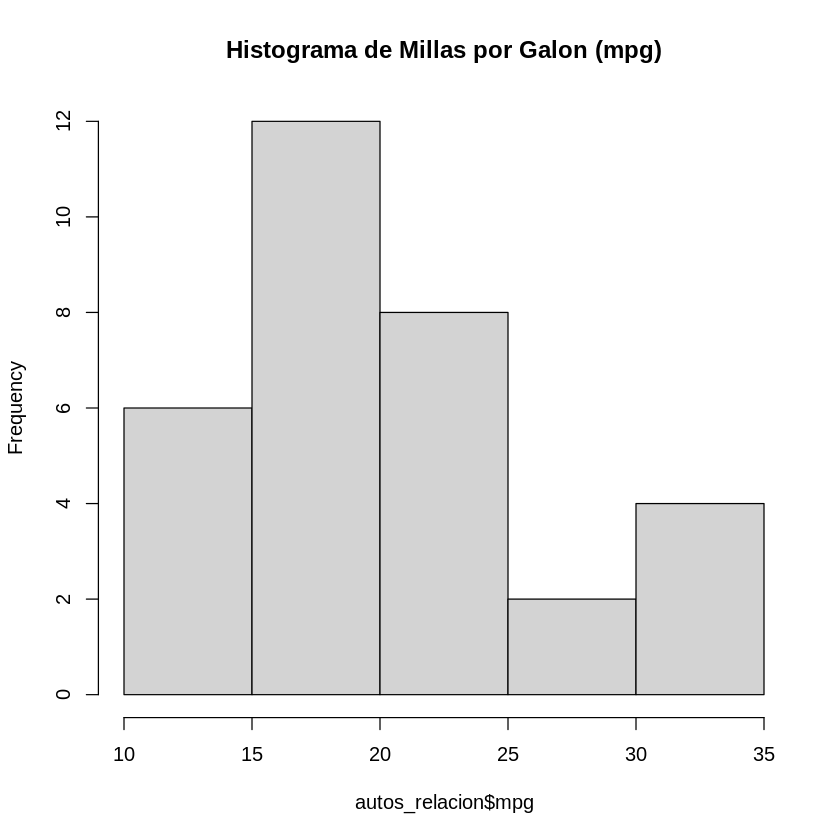

In [19]:
hist(autos_relacion$mpg, main=paste("Histograma de Millas por Galon (mpg)"))

**Tarea 5**
* Crear una función simple que convierta el rendimiento de millas por galón (mpg) a kilómetros por litro (kml = mpg * 0.425144)


In [20]:
mpg_a_kml<-function(x){
  return (x*0.425144)
}

In [21]:
# Primera forma usando el operador $
mtcars$kml<-mpg_a_kml(mtcars$mpg)

head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kml
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,8.928024
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,8.928024
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,9.693283
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,9.098082
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,7.950193
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,7.695106


In [22]:
# Segunda forma: usar mutate de la libreria dplyr
data_autos = mtcars %>%
mutate(kml = mpg_a_kml(mpg))

head(data_autos)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kml
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,8.928024
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,8.928024
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,9.693283
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,9.098082
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,7.950193
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,7.695106
